<a href="https://colab.research.google.com/github/EduardoAcostaC/Simulacion-I/blob/main/MetodoAceptacionRechazo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Método de Aceptación y Rechazo con Distribución Triangular

El **método de aceptación y rechazo** permite generar variables aleatorias según una distribución deseada \( f(x) \), utilizando una distribución auxiliar más sencilla \( g(x) \), comúnmente una distribución uniforme.

### Pasos del método:

1. Generar $x \sim g(x)$.
2. Generar $u \sim \text{Uniforme}(0, 1)$.
3. Aceptar $x$ si:

$$
u \leq \frac{f(x)}{M \cdot g(x)}
$$

donde $M \geq \max \left( \frac{f(x)}{g(x)} \right)$.

---

## Distribución Triangular

La **distribución triangular** es una distribución continua definida por tres parámetros:

- \( a \): mínimo
- \( b \): moda
- \( c \): máximo

Su función de densidad \( f(x) \) es:

\[
f(x) = \begin{cases}
0 & x < a \\
\frac{2(x - a)}{(b - a)(c - a)} & a \leq x < b \\
\frac{2(c - x)}{(c - b)(c - a)} & b \leq x \leq c \\
0 & x > c
\end{cases}
\]

### Propiedades teóricas:

- **Media**:  
  $$
  \mu = \frac{a + b + c}{3}
  $$

- **Varianza**:  
  $$
  \sigma^2 = \frac{a^2 + b^2 + c^2 - ab - ac - bc}{18}
  $$

- **Desviación estándar**:  
  $$
  \sigma = \sqrt{\sigma^2}
  $$
---

Este método es útil cuando no es posible obtener directamente la inversa de la función de distribución acumulada, como ocurre en muchas


=== Resultados del programa ===
Número de muestras aceptadas: 100372
Media: 2.99959
Varianza: 0.66786
Desviación estándar: 0.81723

=== Resultados teóricos ===
Media teórica: 3.00000
Varianza teórica: 0.66667
Desviación estándar teórica: 0.81650


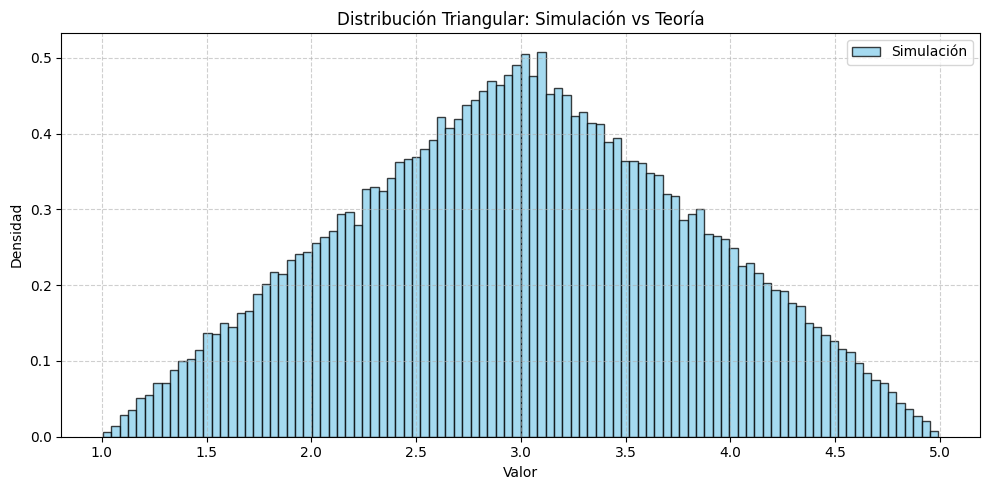

In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la distribución triangular
a = 1   # mínimo
b = 3   # moda
c = 5   # máximo
M = 2 / (c - a) # Altura máxima
# Función de densidad para la distribución triangular
def f(x):
    if a <= x <= b:
        return (2 * (x - a)) / ((c - a) * (b - a))  # Parte creciente
    elif b < x <= c:
        return (2 * (c - x)) / ((c - a) * (c - b))  # Parte decreciente
    else:
        return 0  # Fuera del dominio

# Método de Aceptación-Rechazo para generar muestras
def experimentos(n):
    muestras = []
    for _ in range(n):
        R1 = random.random()
        R2 = random.random()
        x = a + (c - a) * R1
        if R2 <= f(x) / M : # Altura máxima teórica
            muestras.append(x)
    return muestras

# Simulación
n = 200000
datos = experimentos(n)

# Estadísticas empíricas
media_emp = np.mean(datos)
var_emp = np.var(datos)
std_emp = np.std(datos)

# Estadísticas teóricas
media_teo = (a + b + c) / 3
var_teo = (a**2 + b**2 + c**2 - a*b - a*c - b*c) / 18
std_teo = np.sqrt(var_teo)

# Resultados
print("=== Resultados del programa ===")
print(f"Número de muestras aceptadas: {len(datos)}")
print(f"Media: {media_emp:.5f}")
print(f"Varianza: {var_emp:.5f}")
print(f"Desviación estándar: {std_emp:.5f}")

print("\n=== Resultados teóricos ===")
print(f"Media teórica: {media_teo:.5f}")
print(f"Varianza teórica: {var_teo:.5f}")
print(f"Desviación estándar teórica: {std_teo:.5f}")


plt.figure(figsize=(10, 5))
plt.hist(datos, bins=100, density=True, color='skyblue', edgecolor='black', alpha=0.75, label='Simulación')

plt.title('Distribución Triangular: Simulación')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
